Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
import sys
!{sys.executable}-m pip install lightgbm
import warnings
warnings.simplefilter(action="ignore")

'C:\Users\vijay\anaconda3\python.exe-m' is not recognized as an internal or external command,
operable program or batch file.


Data Collection and Analysis

In [2]:
#Including the diabetes dataset to a pandas dataframe
df=pd.read_csv("diabetes.csv")

In [3]:
#printing the first 5 rows of the datas
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Number of rows and columns in this dataframe
df.shape

(768, 9)

In [5]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Printing the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#The distribution of the Outcome Variable was examined.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [8]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0->Non-diabetes
1->Diabetes

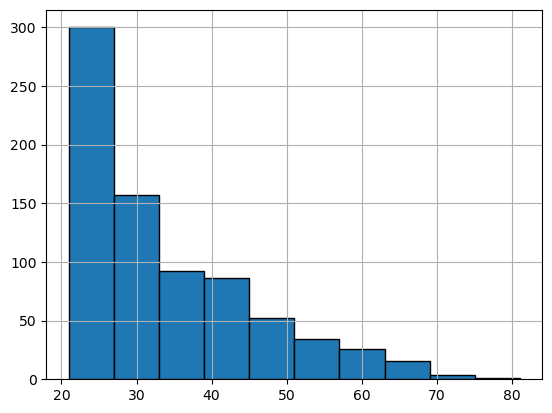

In [9]:
#The histagram of the Age Variable was reached.
df["Age"].hist(edgecolor="black");

In [10]:
print("Max age:"+ str(df["Age"].max()) + "Min age:"+ str(df["Age"].min()))

Max age:81Min age:21


<Axes: xlabel='BMI', ylabel='Density'>

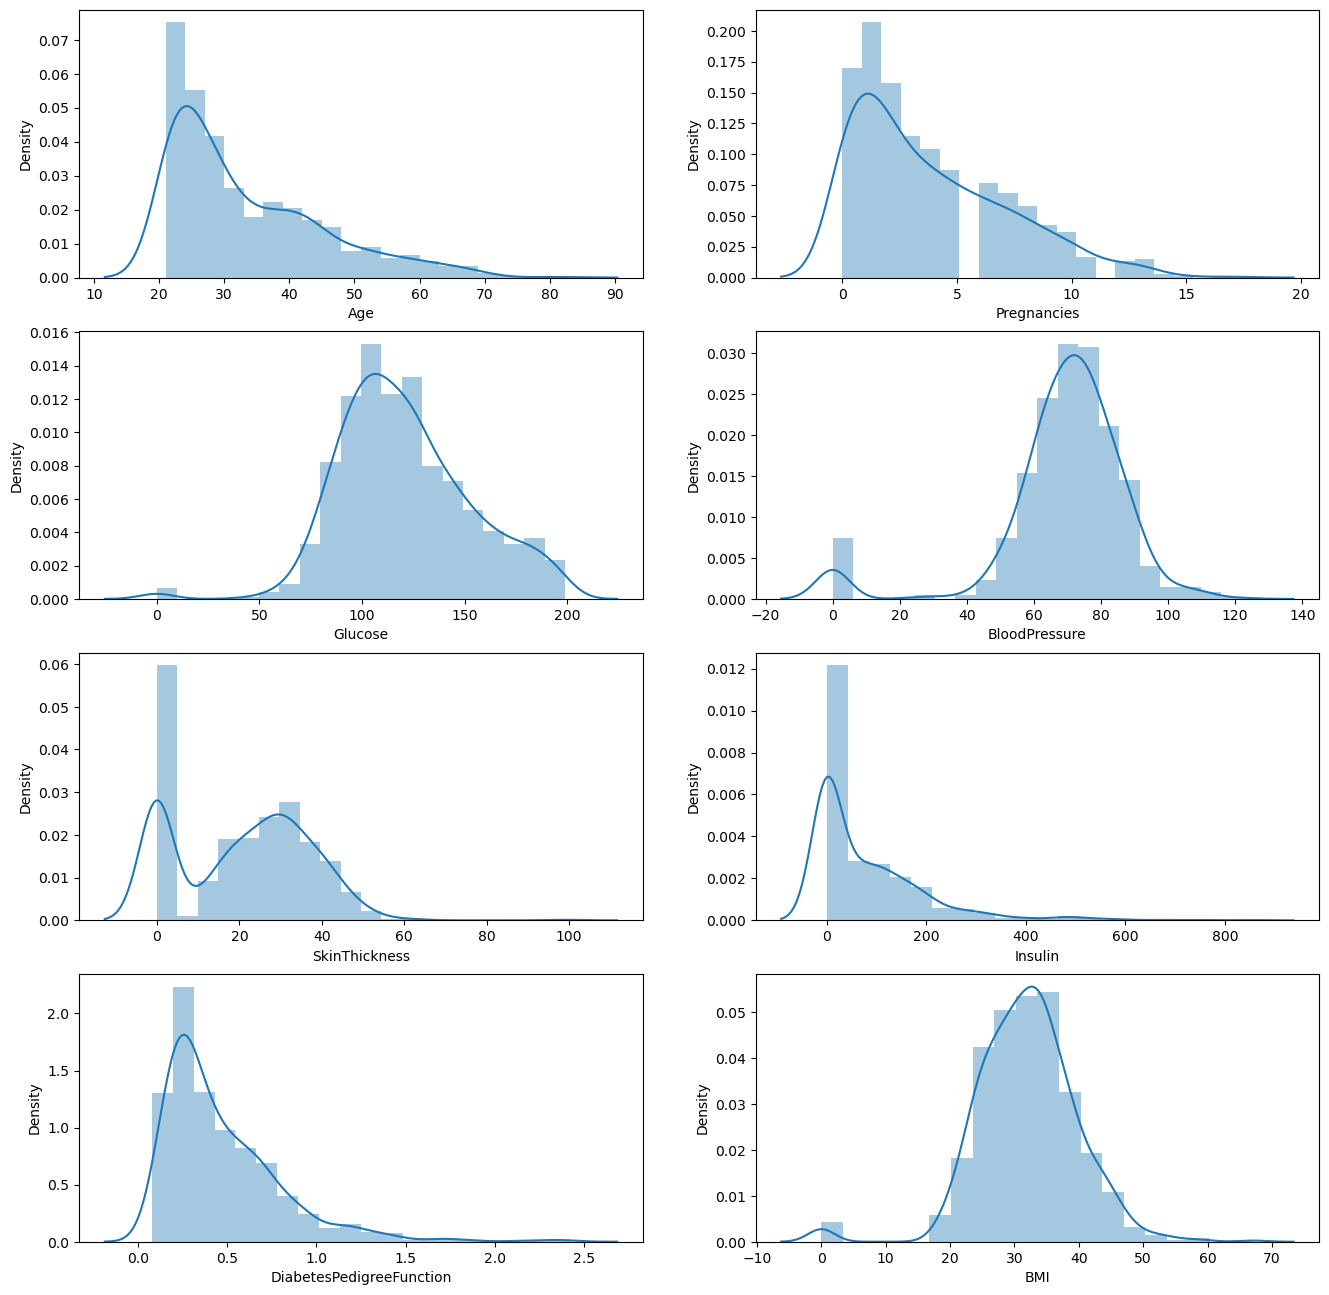

In [11]:
#Histogram and density graphs of all variables were aceessed.
fig,ax=plt.subplots(4,2,figsize=(16,16))
sns.distplot(df.Age,bins=20,ax=ax[0,0])
sns.distplot(df.Pregnancies,bins=20,ax=ax[0,1])
sns.distplot(df.Glucose,bins=20,ax=ax[1,0])
sns.distplot(df.BloodPressure,bins=20,ax=ax[1,1])
sns.distplot(df.SkinThickness,bins=20,ax=ax[2,0])
sns.distplot(df.Insulin,bins=20,ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction,bins=20,ax=ax[3,0])
sns.distplot(df.BMI,bins=20,ax=ax[3,1])

In [12]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


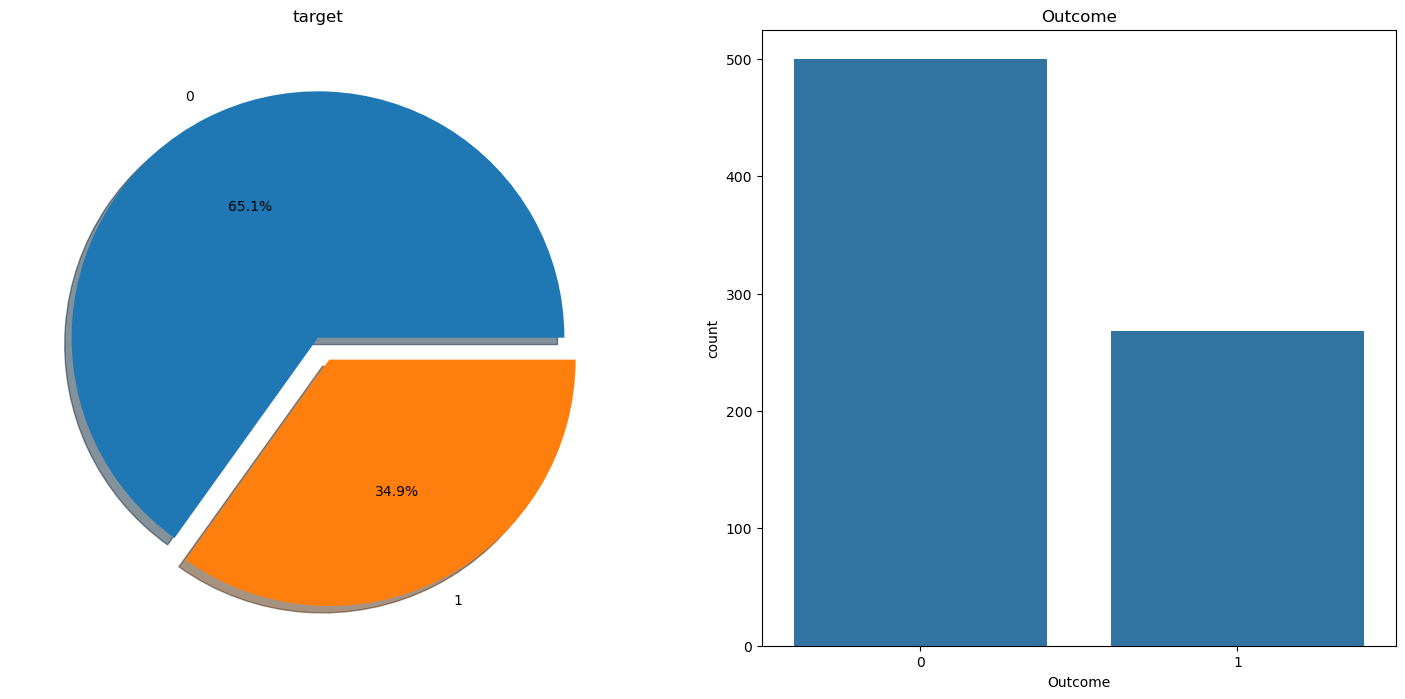

In [13]:
#The distribution of the outcome variable in the data was examined and visualized
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot(x="Outcome",data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [14]:
#Accesss to the correlation of the data set was provided.what kind of relationship is examined between the variables.
#If the correlation value is>0,there is a positive correlation.while the value of ane variable increases,the value of the other variable also increases
#correlation=0 meeans no correlation is<0,there is a negative corr.while one variable increases,the other variable decreases.
#when the corr are examined,there are 2 variables that act as a positive corr to the salary dependent variable
#these variables are glucose.as these increase,outcome variable increases.
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


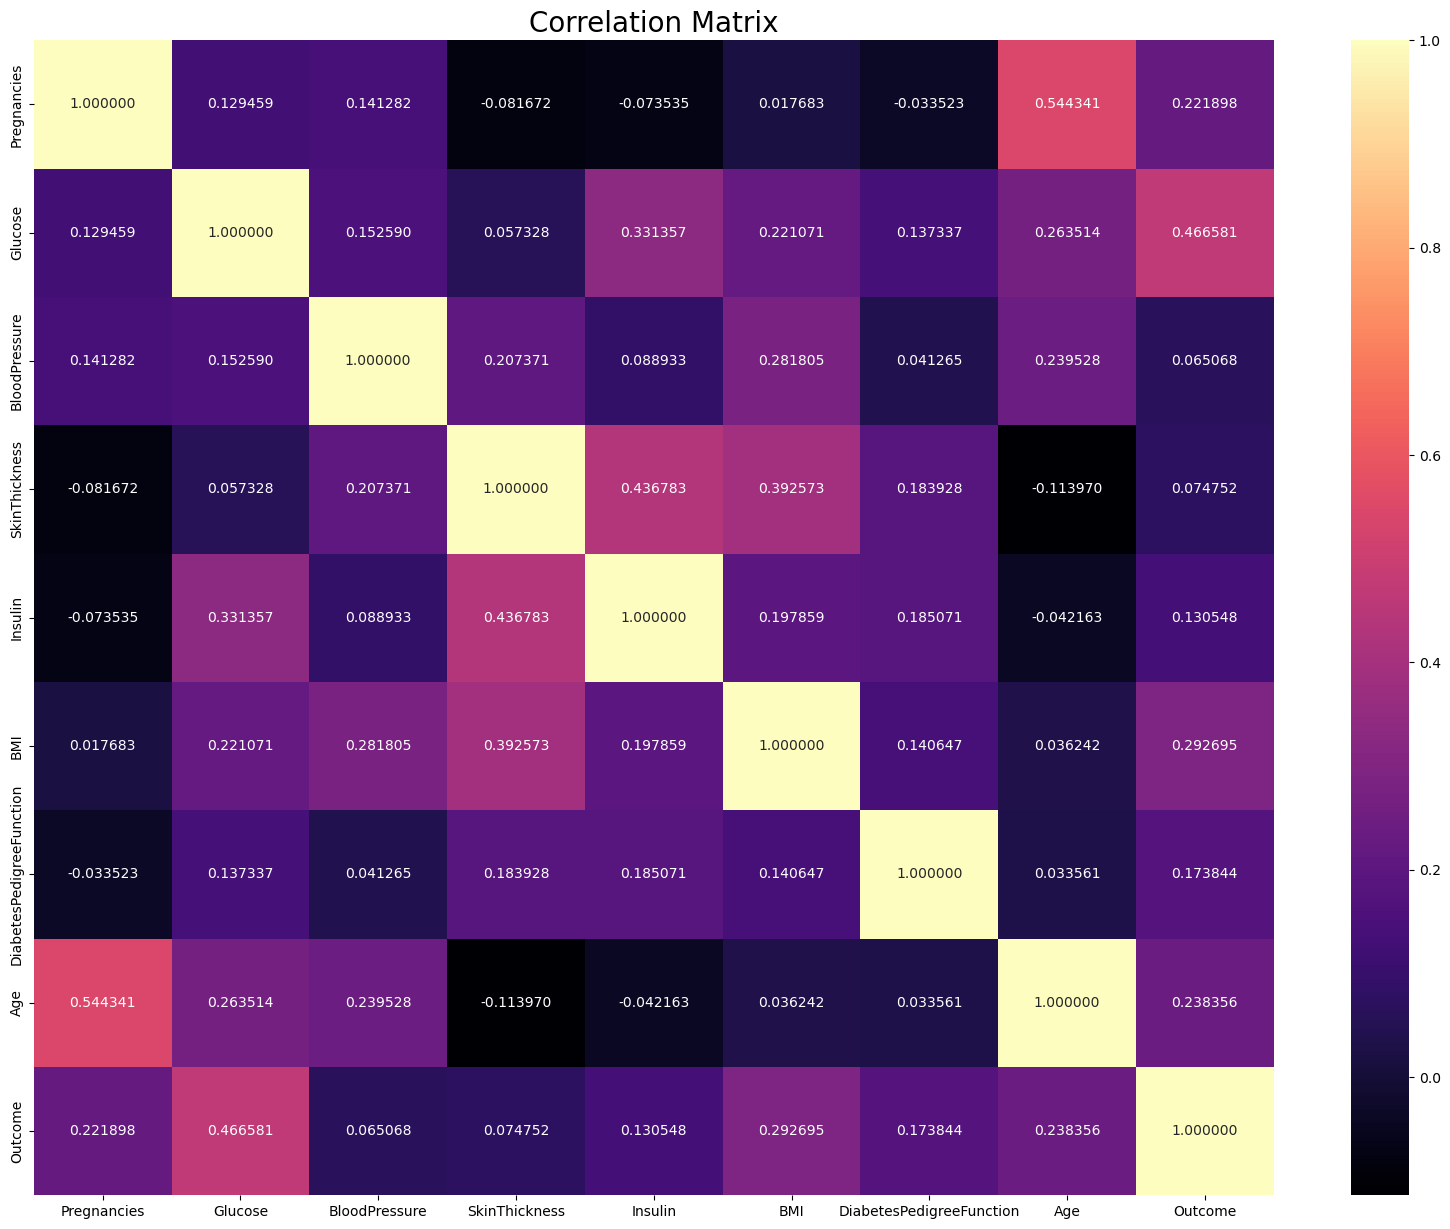

In [15]:
#corr matrix graph of the data set
f,ax=plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,fmt="2f",ax=ax,cmap="magma")
ax.set_title("Correlation Matrix",fontsize=20)
plt.show()

In [16]:
#separating the data and labels
x=df.drop(columns="Outcome",axis=1)
y=df["Outcome"]

In [17]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [18]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [19]:
scaler=StandardScaler()

In [20]:
scaler.fit(x)

StandardScaler()

In [21]:
Standardized_data=scaler.transform(x)

In [22]:
print(Standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [23]:
X=Standardized_data
Y=df["Outcome"]

In [24]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [26]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [27]:
#training the support vector machine classifier
classifier=svm.SVC(kernel="linear")

In [28]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Accuracy Score

In [29]:
#accuracy score on the training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [30]:
print("Accuracy score of the training data:",training_data_accuracy)

Accuracy score of the training data: 0.7866449511400652


In [31]:
#accuracy score of the test data
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [32]:
print("Accuracy score of the test data:",test_data_accuracy)

Accuracy score of the test data: 0.7727272727272727


In [33]:
#This converts inputs data into a format suitable for machine learning model prediction by converting it to a numpy array,reshaping it,and standardizing it using a scaler object.
input_data=(4,110,92,0,0,37.6,0.191,30)

#changing the input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
    print("The person is not diabetes")
else:
    print("The person is diabetes")

[[ 0.04601433 -0.34096773  1.18359575 -1.28821221 -0.69289057  0.71168975
  -0.84827977 -0.27575966]]
[0]
The person is not diabetes


In [34]:
#finally uses a trained classifier to predict  whether a person has  diabetes based on input data and print a message indicating the prediction.